# Análise de indicadores econômicos, educacionais e sociais do Município do Rio de Janeiro

A base utilizada para o projeto:
- [Índice de Progresso Social do Rio de Janeiro (Prefeitura do Rio)](https://https://basedosdados.org/dataset/57c5dc55-10cb-44f9-9f13-6a2fb24392ed?table=1ed7e730-dd1d-4b1c-bbcb-7ddf74541eb6)

**Ideia de análise:** Comparar os índices entres as localidades

- Quais são as melhores e piores regiões? Quais as melhores e piores localidades?
- RAs com grande concentração de comunidades tem os piores índices? Como isso é percepetivel nos indices de educação?
- Quais RAs tem os melhores indices de acesso a educação superior? E as localidades?
  - Acesso a internet x Prop. de Jovens no ensino superior
  - Quais as regiões possuem maiores parcelas de pessoas no ensino superior



## Instalando e importando bibliotecas e datasets

In [ ]:
!pip install basedosdados

In [3]:
import basedosdados as bd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 12})

In [53]:
ips_indicadores = bd.read_table(dataset_id='br_rj_rio_de_janeiro_ipp_ips',
table_id='indicadores',
billing_project_id="ufrjanalytica-414707")

Downloading: 100%|██████████| 99/99 [00:00<00:00, 329.84rows/s]


In [54]:
ips_componentes = bd.read_table(dataset_id='br_rj_rio_de_janeiro_ipp_ips',
table_id='dimensoes_componentes',
billing_project_id="ufrjanalytica-414707")

Downloading: 100%|██████████| 99/99 [00:00<00:00, 303.55rows/s]


## Tratamento e visualização inicial dos dados

In [45]:
print(ips_componentes.shape, ips_indicadores.shape)

(99, 18) (99, 38)


In [59]:
ips_componentes['regiao_administrativa'].unique()

array(['Rio De Janeiro', 'Portuaria', 'Centro', 'Rio Comprido',
       'Botafogo', 'Copacabana', 'Lagoa', 'São Cristovão', 'Tijuca',
       'Vila Isabel', 'Ramos', 'Penha', 'Inhaúma', 'Méier', 'Iraja',
       'Madureira', 'Jacarepaguá', 'Bangu', 'Campo Grande', 'Santa Cruz',
       'Ilha Do Governador', 'Anchieta', 'Santa Teresa',
       'Barra Da Tijuca', 'Pavuna', 'Guaratiba', 'Rocinha', 'Jacarezinho',
       'Complexo Do Alemão', 'Maré', 'Vigário Geral', 'Realengo',
       'Cidade De Deus'], dtype=object)

In [57]:
ips_indicadores['regiao_administrativa'].unique()

array(['Rio De Janeiro', 'Portuaria', 'Centro', 'Rio Comprido',
       'Botafogo', 'Copacabana', 'Lagoa', 'São Cristovão', 'Tijuca',
       'Vila Isabel', 'Ramos', 'Penha', 'Inhaúma', 'Méier', 'Iraja',
       'Madureira', 'Jacarepaguá', 'Bangu', 'Campo Grande', 'Santa Cruz',
       'Ilha Do Governador', 'Anchieta', 'Santa Teresa',
       'Barra Da Tijuca', 'Pavuna', 'Guaratiba', 'Rocinha', 'Jacarezinho',
       'Complexo Do Alemão', 'Maré', 'Vigário Geral', 'Realengo',
       'Cidade De Deus'], dtype=object)

Tendo em vista que a Região Administrativa "Rio de Janeiro" desta tabela **não consta** no site da Prefeitura do Rio e a ausência da RA Ilha de Paquetá, achei pertinente considerar a RA Rio De Janeiro como Ilha de Paquetá.

In [107]:
# Alterando o nome da região administrativa Rio De Janeiro para Ilha de Paquetá
ips_componentes['regiao_administrativa'].replace('Rio De Janeiro', 'Ilha de Paquetá', inplace=True)
ips_indicadores['regiao_administrativa'].replace('Rio De Janeiro', 'Ilha de Paquetá', inplace=True)

In [108]:
ips_componentes.head()

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,2016,Ilha de Paquetá,60.77,75.84,70.19,83.68,78.16,71.34,53.28,49.96,50.89,62.03,50.26,53.20,61.46,54.82,64.14,32.36
1,2016,Portuaria,45.33,59.10,87.63,80.80,67.97,0.00,41.67,41.34,20.73,64.74,39.89,35.23,39.35,61.94,34.18,5.43
2,2016,Centro,57.75,62.43,59.38,74.18,91.85,24.31,52.41,55.60,56.00,41.04,56.99,58.42,45.89,87.27,52.24,48.26
3,2016,Rio Comprido,52.43,58.97,61.22,84.36,64.78,25.52,47.19,34.00,42.08,47.84,64.84,51.14,66.89,50.45,64.74,22.48
4,2016,Botafogo,87.12,93.32,85.15,98.49,99.55,90.08,81.13,78.47,86.52,81.46,78.07,86.91,68.19,85.74,94.30,99.39


In [109]:
ips_indicadores.head()

,ano,regiao_administrativa,mortalidade_infancia,prop_baixo_peso_nascer,mortalidade_materna,taxa_internacoes_infantis_crise_respiratoria_aguda,prop_acesso_agua_canalizada,prop_acesso_esgotamento_sanitario,prop_acesso_banheiro,prop_populacao_vivendo_favelas_nao_urbanizadas,...,taxa_participacao_politica,prop_gravidez_adolescencia,trabalho_infantil,indice_acesso_cultura,taxa_violencia_contra_mulher,taxa_homicidios_jovens_negros,prop_vulnerabilidade_familiar,prop_pessoas_ensino_superior,prop_negros_indigenas_ensino_superior,prop_frequencia_ensino_superior
0,2016,Ilha de Paquetá,2.77,9.21,52.61,8.48,98.47,89.95,98.73,19.16,...,0.21,16.42,11.14,30.34,353.56,9.00,2.29,21.26,9.82,28.04
1,2016,Portuaria,0.91,7.40,75.81,9.66,99.73,93.97,94.26,13.18,...,0.25,20.17,9.51,67.26,601.89,6.13,4.54,3.88,2.10,9.81
2,2016,Centro,3.92,10.53,0.00,9.77,99.66,92.23,92.34,0.26,...,0.30,13.16,0.00,100.00,1009.09,5.41,1.35,24.02,18.03,39.37
3,2016,Rio Comprido,3.71,10.29,27.93,7.88,99.46,93.03,96.45,35.44,...,0.24,16.99,3.69,7.18,417.22,4.94,2.28,15.16,6.63,21.80
4,2016,Botafogo,1.05,9.16,14.80,4.15,99.87,99.07,99.33,1.67,...,0.26,4.32,8.33,68.39,217.04,2.50,0.59,57.03,35.17,68.69


In [110]:
# Selecionando os dados de 2020 (os mais recentes do dataset)
componentes_2020 = ips_componentes.loc[ips_componentes['ano'] == 2020].reset_index().drop('index', axis=1)
indicadores_2020 = ips_indicadores.loc[ips_indicadores['ano'] == 2020].reset_index().drop('index', axis=1)

# o método reset_index foi utilizado para desfazer os indices da tabela com todos os anos. o index 69 passa a ser 0 e assim por diante

In [111]:
indicadores_2020.head()

,ano,regiao_administrativa,mortalidade_infancia,prop_baixo_peso_nascer,mortalidade_materna,taxa_internacoes_infantis_crise_respiratoria_aguda,prop_acesso_agua_canalizada,prop_acesso_esgotamento_sanitario,prop_acesso_banheiro,prop_populacao_vivendo_favelas_nao_urbanizadas,...,taxa_participacao_politica,prop_gravidez_adolescencia,trabalho_infantil,indice_acesso_cultura,taxa_violencia_contra_mulher,taxa_homicidios_jovens_negros,prop_vulnerabilidade_familiar,prop_pessoas_ensino_superior,prop_negros_indigenas_ensino_superior,prop_frequencia_ensino_superior
0,2020,Ilha de Paquetá,2.79,9.36,80.63,8.96,98.47,89.95,98.73,14.00,...,0.25,11.78,3.77,30.16,270.94,4.96,2.02,21.26,9.82,28.04
1,2020,Portuaria,4.46,9.50,0.00,6.16,99.73,93.97,94.26,4.10,...,0.28,17.63,0.00,14.89,405.72,12.14,4.54,3.88,2.10,9.81
2,2020,Centro,3.16,9.78,90.99,14.30,99.66,92.23,92.34,0.26,...,0.30,9.78,3.67,92.44,653.18,13.15,1.35,24.02,18.03,39.37
3,2020,Rio Comprido,2.36,9.79,31.55,5.07,99.46,93.03,96.45,8.74,...,0.28,12.66,2.08,17.89,315.29,7.60,2.28,15.16,6.63,21.80
4,2020,Botafogo,1.05,8.39,33.11,2.73,99.87,99.07,99.33,1.67,...,0.29,3.20,1.24,58.81,193.97,0.42,0.49,57.03,35.17,68.69


In [112]:
indicadores_2020.columns

Index(['ano', 'regiao_administrativa', 'mortalidade_infancia',
       'prop_baixo_peso_nascer', 'mortalidade_materna',
       'taxa_internacoes_infantis_crise_respiratoria_aguda',
       'prop_acesso_agua_canalizada', 'prop_acesso_esgotamento_sanitario',
       'prop_acesso_banheiro',
       'prop_populacao_vivendo_favelas_nao_urbanizadas',
       'prop_acesso_energia_eletrica',
       'prop_adensamento_habitacional_excessivo', 'taxa_homicidios',
       'taxa_roubos_rua', 'prop_alfabetizacao',
       'qualidade_ensino_fundamental_anos_iniciais',
       'qualidade_ensino_fundamental_anos_finais',
       'prop_abandono_escolar_ensino_medio',
       'prop_acesso_telefone_celular_fixo', 'prop_acesso_internet',
       'taxa_mortalidade_doencas_cronicas', 'taxa_incidencia_dengue',
       'taxa_mortalidade_tuberculose_hiv', 'prop_coleta_seletiva_lixo',
       'degradacao_areas_verdes', 'prop_mobilidade_urbana',
       'taxa_homicidios_acao_policial', 'tempo_medio_deslocamento',
       'taxa_p

In [113]:
componentes_2020.columns

Index(['ano', 'regiao_administrativa', 'ips_geral',
       'necessidades_humanas_basicas_nota_dimensao',
       'nutricao_cuidados_medicos_basicos', 'agua_saneamento', 'moradia',
       'seguranca_pessoal', 'fundamentos_bem_estar_nota_dimensao',
       'acesso_conhecimento_basico', 'acesso_informacao', 'saude_bem_estar',
       'qualidade_meio_ambiente', 'oportunidades_nota_dimensao',
       'direitos_individuais', 'liberdades_individuais', 'tolerancia_inclusao',
       'acesso_educacao_superior'],
      dtype='object')

In [114]:
componentes_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ano                                         33 non-null     Int64  
 1   regiao_administrativa                       33 non-null     object 
 2   ips_geral                                   33 non-null     float64
 3   necessidades_humanas_basicas_nota_dimensao  33 non-null     float64
 4   nutricao_cuidados_medicos_basicos           33 non-null     float64
 5   agua_saneamento                             33 non-null     float64
 6   moradia                                     33 non-null     float64
 7   seguranca_pessoal                           33 non-null     float64
 8   fundamentos_bem_estar_nota_dimensao         33 non-null     float64
 9   acesso_conhecimento_basico                  33 non-null     float64
 10  acesso_informaca

In [115]:
indicadores_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 38 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ano                                                 33 non-null     Int64  
 1   regiao_administrativa                               33 non-null     object 
 2   mortalidade_infancia                                33 non-null     float64
 3   prop_baixo_peso_nascer                              33 non-null     float64
 4   mortalidade_materna                                 33 non-null     float64
 5   taxa_internacoes_infantis_crise_respiratoria_aguda  33 non-null     float64
 6   prop_acesso_agua_canalizada                         33 non-null     float64
 7   prop_acesso_esgotamento_sanitario                   33 non-null     float64
 8   prop_acesso_banheiro                                33 non-null     float64
 9   p

## Classificando as Regiões Administrativas por localidades

**Zona Norte:** São Cristóvão, Tijuca, Vila Isabel, Ramos, Penha, Inhaúma, Méier, Irajá, Madureira, Ilha do Governador, Anchieta, Pavuna, Jacarezinho, Complexo do Alemão, Maré, Vigário Geral

**Zona Oeste:** Barra da Tijuca, Bangu, Realengo, Campo Grande, Guaratiba, Santa Cruz, Cidade de Deus e Jacarepaguá

**Zona Sul:** Botafogo, Copacabana, Lagoa e Rocinha

**Centro:** Portuária, Centro, Rio Comprido, Santa Teresa, Paquetá

**Favelas:** Jacarezinho, Complexo Do Alemão, Maré, Cidade De Deus, Rocinha, Pavuna, Campo Grande e Anchieta

In [116]:
indicadores_2020.set_index('regiao_administrativa', inplace=True)
componentes_2020.set_index('regiao_administrativa', inplace=True)

In [118]:
# Selecionando as RAs com grande predominancia de favelas

favelas = ['Jacarezinho', 'Complexo Do Alemão', 'Maré', 'Cidade De Deus',
           'Rocinha', 'Pavuna', 'Campo Grande','Anchieta']
indicadores_favela = indicadores_2020.filter(items=favelas, axis=0)
componentes_favela = componentes_2020.filter(items=favelas, axis=0)
indicadores_favela['categorizacao'] = 'Favela'
componentes_favela['categorizacao'] = 'Favela'

In [119]:
# Categorizando RAs com predominancia de favelas
indicadores_outros = indicadores_2020.drop(favelas)
componentes_outros = componentes_2020.drop(favelas)
indicadores_outros['categorizacao'] = 'Outro'
componentes_outros['categorizacao'] = 'Outro'

In [120]:
indicadores_2020 = pd.concat([indicadores_favela, indicadores_outros])
componentes_2020 = pd.concat([componentes_favela, componentes_outros])

In [121]:
# Indicadores das RAs da Zona Norte
ra_zona_norte = ['São Cristovão', 'Tijuca', 'Vila Isabel', 'Ramos',
                 'Penha', 'Inhaúma', 'Méier', 'Iraja', 'Madureira',
                 'Ilha Do Governador', 'Anchieta', 'Pavuna', 'Jacarezinho',
                 'Complexo Do Alemão', 'Maré', 'Vigário Geral']

indicadores_zn = indicadores_2020.filter(items=ra_zona_norte, axis=0)
indicadores_zn['localidade'] = 'Zona Norte'
componentes_zn = componentes_2020.filter(items=ra_zona_norte, axis=0)
componentes_zn['localidade'] = 'Zona Norte'

In [122]:
# Indicadores das RAs da Zona Oeste
ra_zona_oeste = ['Barra Da Tijuca', 'Bangu', 'Realengo', 'Campo Grande',
                 'Guaratiba', 'Santa Cruz', 'Cidade De Deus', 'Jacarepaguá']

indicadores_zo = indicadores_2020.filter(items=ra_zona_oeste, axis=0)
indicadores_zo['localidade'] = 'Zona Oeste'
componentes_zo = componentes_2020.filter(items=ra_zona_oeste, axis=0)
componentes_zo['localidade'] = 'Zona Oeste'

In [123]:
# Indicadores das RAs da Zona Sul
ra_zona_sul = ['Botafogo', 'Copacabana', 'Lagoa', 'Rocinha']

indicadores_zs = indicadores_2020.filter(items=ra_zona_sul, axis=0)
indicadores_zs['localidade'] = 'Zona Sul'
componentes_zs = componentes_2020.filter(items=ra_zona_sul, axis=0)
componentes_zs['localidade'] = 'Zona Sul'

In [124]:
# Indicadores das RAs do Centro
ra_centro = ['Portuaria', 'Centro', 'Rio Comprido', 'Santa Teresa', 'Ilha de Paquetá']

indicadores_centro = indicadores_2020.filter(items=ra_centro, axis=0)
indicadores_centro['localidade'] = 'Centro'
componentes_centro = componentes_2020.filter(items=ra_centro, axis=0)
componentes_centro['localidade'] = 'Centro'

In [125]:
# Concatenando os dataframes novamente, agora com a coluna localidade
componentes_2020 = pd.concat([componentes_centro,componentes_zs,componentes_zn,componentes_zo])
indicadores_2020 = pd.concat([indicadores_centro, indicadores_zs, indicadores_zn, indicadores_zo])

In [126]:
# cores utilizadas para cada localidade e categoria

cores1 = {'Zona Sul':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Centro':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Zona Norte':(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'Zona Oeste': (1.0, 0.4980392156862745, 0.054901960784313725)}

cores2 = {'Outro': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
          'Favela':(0.4980392156862745, 0.4980392156862745, 0.4980392156862745)}

Text(0.5, 0, 'Índice de Progresso Social')

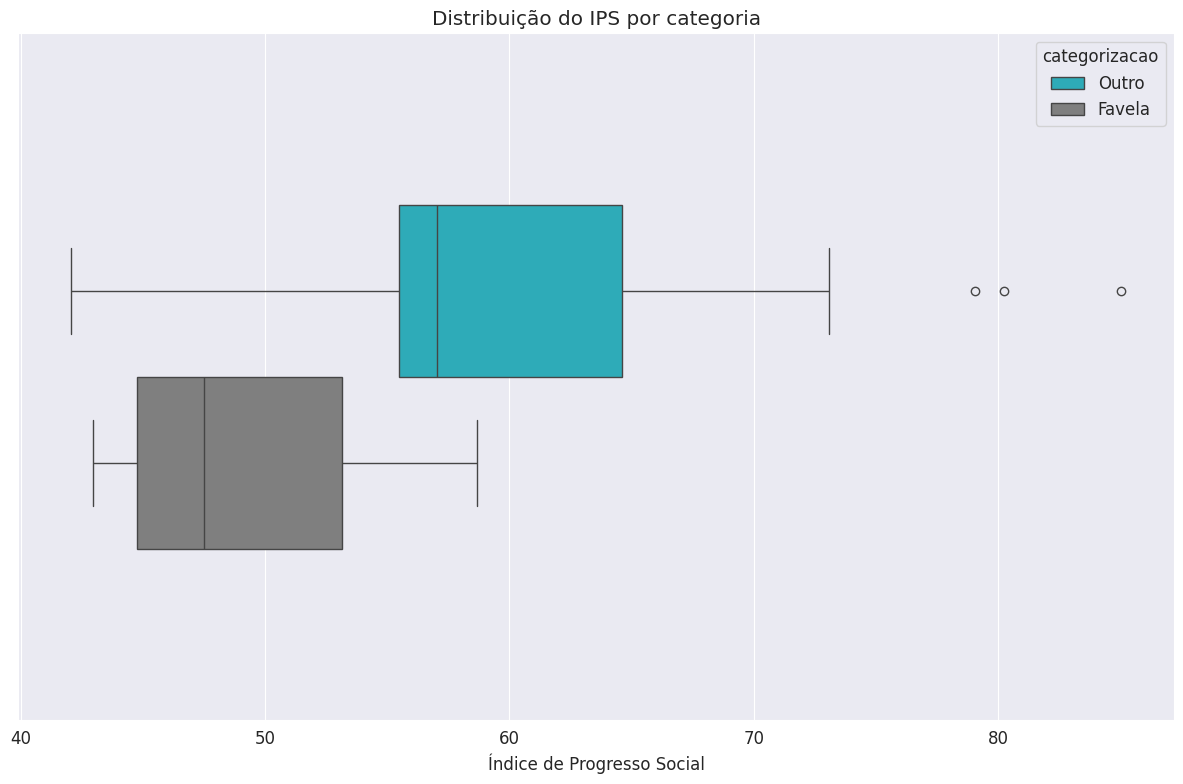

In [127]:
sns.boxplot(componentes_2020, x='ips_geral', hue='categorizacao', width=0.5, palette=cores2)
plt.title('Distribuição do IPS por categoria')
plt.xlabel('Índice de Progresso Social')

<Figure size 1000x1000 with 0 Axes>

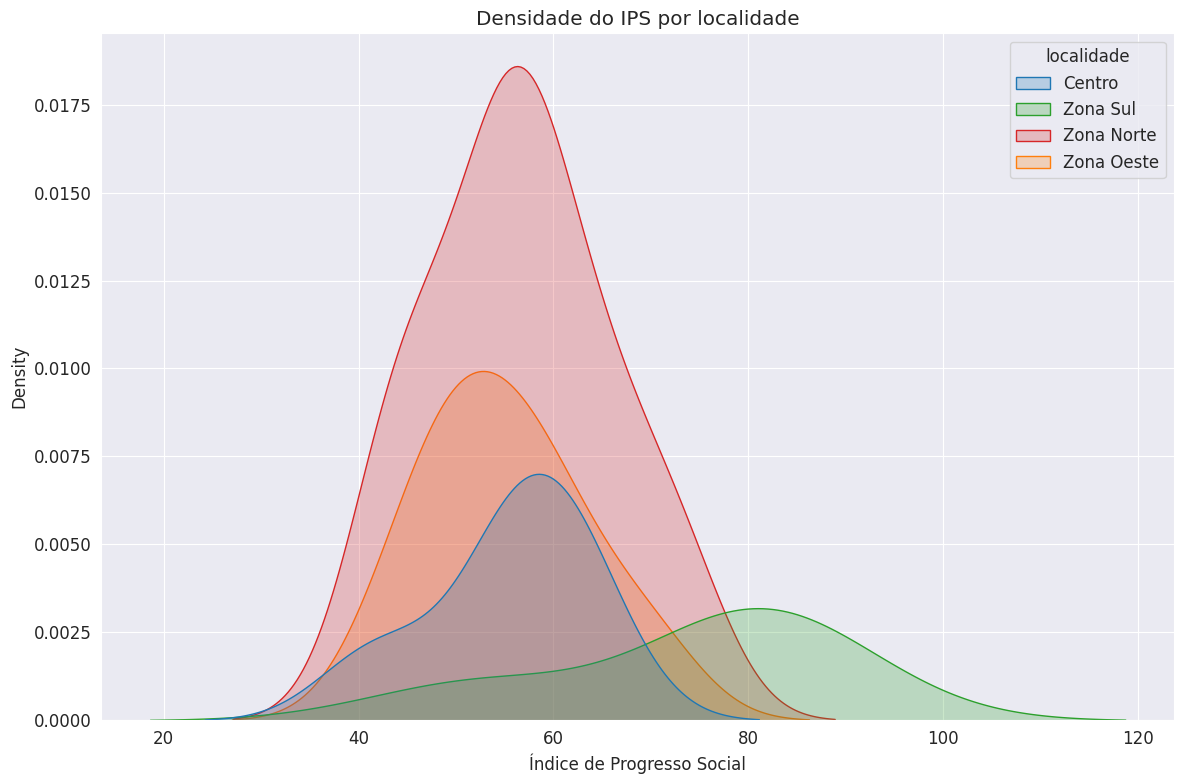

<Figure size 1000x1000 with 0 Axes>

In [128]:
sns.kdeplot(componentes_2020, x='ips_geral', hue='localidade', fill=True, palette=cores1)
plt.title('Densidade do IPS por localidade')
plt.xlabel('Índice de Progresso Social')
plt.figure(figsize=(10,10))

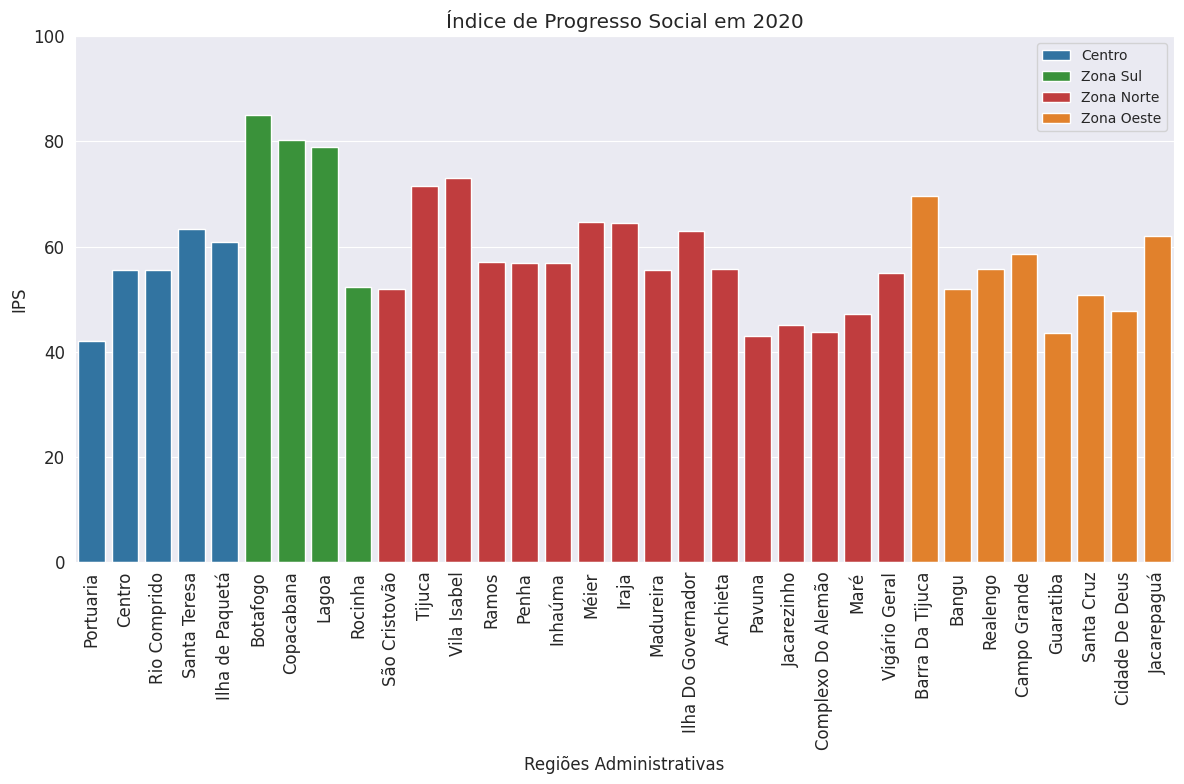

In [129]:
# IPS em todas as RAs


sns.barplot(componentes_2020, y='ips_geral', x='regiao_administrativa', hue='localidade', palette=cores1)
plt.xticks(rotation=90)
plt.xlabel('Regiões Administrativas')
plt.ylabel('IPS')
plt.ylim((0,100))
plt.legend(fontsize=10)
plt.title('Índice de Progresso Social em 2020')
plt.show()


## Melhores e piores regiões segundo o IPS

In [130]:
# maiores IPS
componentes_2020.sort_values('ips_geral', ascending=False).head(10).filter(['ips_geral', 'localidade', 'categorizacao']).reset_index()

,regiao_administrativa,ips_geral,localidade,categorizacao
0,Botafogo,85.03,Zona Sul,Outro
1,Copacabana,80.23,Zona Sul,Outro
2,Lagoa,79.02,Zona Sul,Outro
3,Vila Isabel,73.05,Zona Norte,Outro
4,Tijuca,71.61,Zona Norte,Outro
5,Barra Da Tijuca,69.70,Zona Oeste,Outro
6,Méier,64.61,Zona Norte,Outro
7,Iraja,64.57,Zona Norte,Outro
8,Santa Teresa,63.26,Centro,Outro
9,Ilha Do Governador,62.97,Zona Norte,Outro


Entre as 5 melhores regiões administrativas, os três primeiros são da Zona Sul do Rio

In [131]:
# menores IPS
componentes_2020.sort_values('ips_geral').head(10).filter(['ips_geral', 'localidade', 'categorizacao']).reset_index()

,regiao_administrativa,ips_geral,localidade,categorizacao
0,Portuaria,42.06,Centro,Outro
1,Pavuna,42.97,Zona Norte,Favela
2,Guaratiba,43.54,Zona Oeste,Outro
3,Complexo Do Alemão,43.68,Zona Norte,Favela
4,Jacarezinho,45.15,Zona Norte,Favela
5,Maré,47.20,Zona Norte,Favela
6,Cidade De Deus,47.84,Zona Oeste,Favela
7,Santa Cruz,50.82,Zona Oeste,Outro
8,Bangu,51.84,Zona Oeste,Outro
9,São Cristovão,51.86,Zona Norte,Outro


In [132]:
# Medidas resumo por categoria
categorias_resumo = componentes_2020.groupby('categorizacao').agg({'ips_geral':['mean','median','std']})
resumo = {'mean':'Média', 'median':'Mediana', 'std':'Desvio Padrão'}
categorias_resumo.rename(columns=resumo)

ips_geral                      
                  Média Mediana Desvio Padrão
categorizacao                                
Favela         49.18875   47.52      5.773586
Outro          61.00840   57.04     10.757333

In [133]:
# Medidas Resumo por localidade
zonas_resumo = componentes_2020.groupby('localidade').agg({'ips_geral':['mean','median','std']})
zonas_resumo.rename(columns=resumo)

ips_geral                      
                Média Mediana Desvio Padrão
localidade                                 
Centro      55.440000  55.590      8.197948
Zona Norte  56.553125  56.320      9.178699
Zona Oeste  55.015000  53.800      8.353160
Zona Sul    74.137500  79.625     14.807560

In [134]:
componentes_2020.query('localidade == "Zona Sul"').filter(['ips_geral'])

,ips_geral
regiao_administrativa,
Botafogo,85.03
Copacabana,80.23
Lagoa,79.02
Rocinha,52.27


## Analisando os dados de Educação

In [135]:
# Selecionando os indicadores relacionados a educação e informação
col_ind_edu = ['localidade','categorizacao','prop_acesso_internet',
       'prop_pessoas_ensino_superior',
       'prop_negros_indigenas_ensino_superior',
       'prop_frequencia_ensino_superior']

indicadores_edu = indicadores_2020.filter(items=col_ind_edu)

In [136]:
# Selecionando os componentes relacionados ao educação superior
col_componentes_edu = ['localidade', 'categorizacao','acesso_educacao_superior']

componentes_edu = componentes_2020.filter(items=col_componentes_edu)

Text(0.5, 1.0, 'Regiões com as maiores proporções de domicílios com internet')

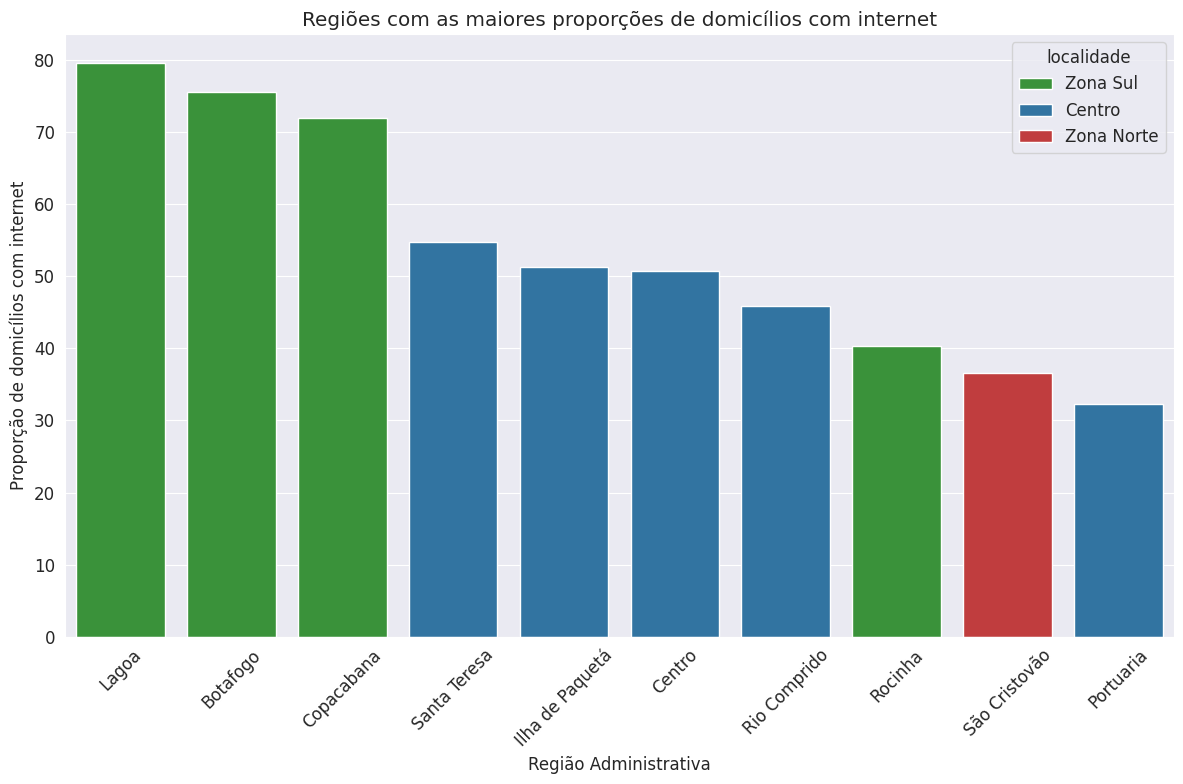

In [137]:
acesso_internet = indicadores_edu.head(10).sort_values('prop_acesso_internet', ascending=False)
sns.barplot(acesso_internet, x='regiao_administrativa', y='prop_acesso_internet', hue='localidade', palette=cores1)
plt.xticks(rotation=45)
plt.xlabel('Região Administrativa')
plt.ylabel('Proporção de domicílios com internet')
plt.title('Regiões com as maiores proporções de domicílios com internet')



Text(0.5, 1.0, 'Proporção média por categoria')

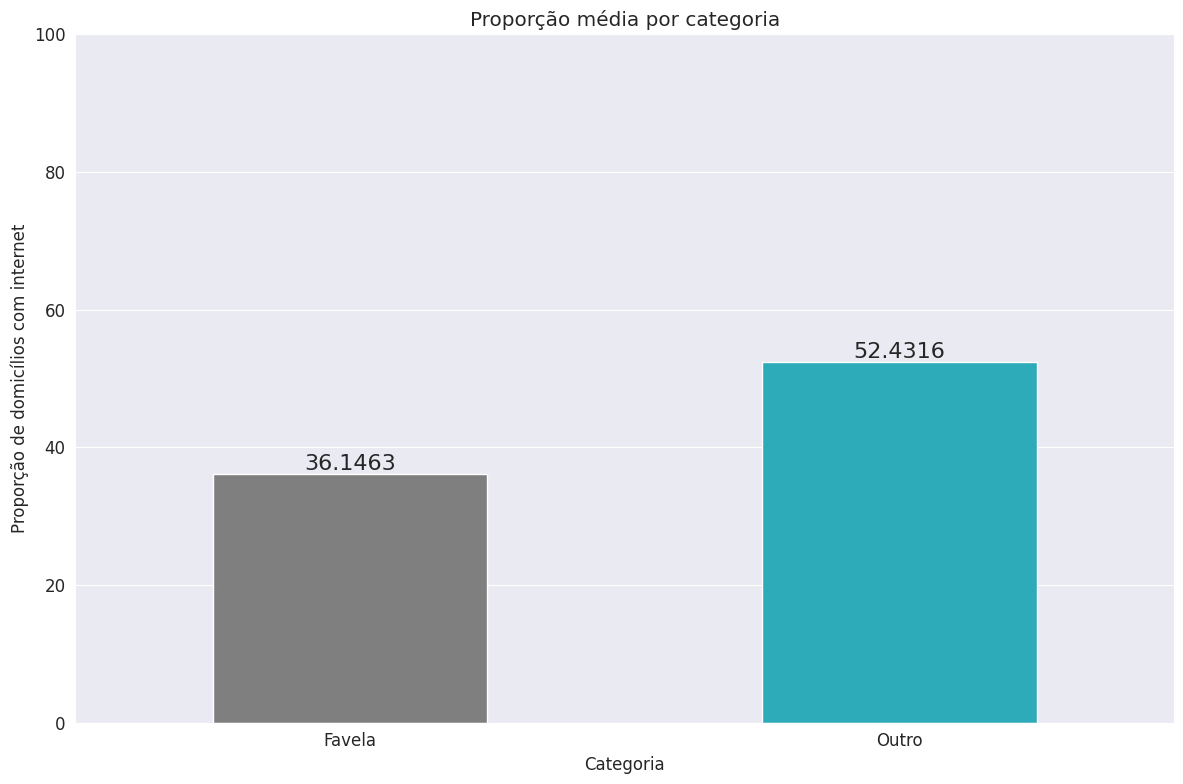

In [138]:
acesso_internet = indicadores_edu.groupby('categorizacao').mean()
fig = sns.barplot(acesso_internet, x='categorizacao', y='prop_acesso_internet', hue='categorizacao', palette=cores2, width=0.5)
fig.bar_label(fig.containers[0], fontsize=16)
fig.bar_label(fig.containers[1], fontsize=16)
plt.ylim((0,100))
plt.xlabel('Categoria')
plt.ylabel('Proporção de domicílios com internet')
plt.title('Proporção média por categoria')

In [139]:
# Maiores indices de acesso a ed.superior
componentes_edu.sort_values('acesso_educacao_superior', ascending=False).head(10).filter(items=['acesso_educacao_superior', 'localidade', 'categorizacao']).reset_index()

,regiao_administrativa,acesso_educacao_superior,localidade,categorizacao
0,Botafogo,99.39,Zona Sul,Outro
1,Copacabana,83.53,Zona Sul,Outro
2,Lagoa,81.59,Zona Sul,Outro
3,Tijuca,78.82,Zona Norte,Outro
4,Vila Isabel,73.20,Zona Norte,Outro
5,Barra Da Tijuca,67.74,Zona Oeste,Outro
6,Centro,48.26,Centro,Outro
7,Méier,47.82,Zona Norte,Outro
8,Ilha Do Governador,43.68,Zona Norte,Outro
9,Iraja,38.14,Zona Norte,Outro


In [140]:
# Menores índices de acesso a ed. superior
componentes_edu.sort_values('acesso_educacao_superior', ascending=True).head(10).filter(items=['acesso_educacao_superior', 'localidade', 'categorizacao']).reset_index()

,regiao_administrativa,acesso_educacao_superior,localidade,categorizacao
0,Complexo Do Alemão,0.52,Zona Norte,Favela
1,Rocinha,1.81,Zona Sul,Favela
2,Maré,2.26,Zona Norte,Favela
3,Jacarezinho,2.34,Zona Norte,Favela
4,Cidade De Deus,4.50,Zona Oeste,Favela
5,Portuaria,5.43,Centro,Outro
6,Guaratiba,5.68,Zona Oeste,Outro
7,Santa Cruz,6.31,Zona Oeste,Outro
8,Pavuna,10.97,Zona Norte,Favela
9,Vigário Geral,12.94,Zona Norte,Outro


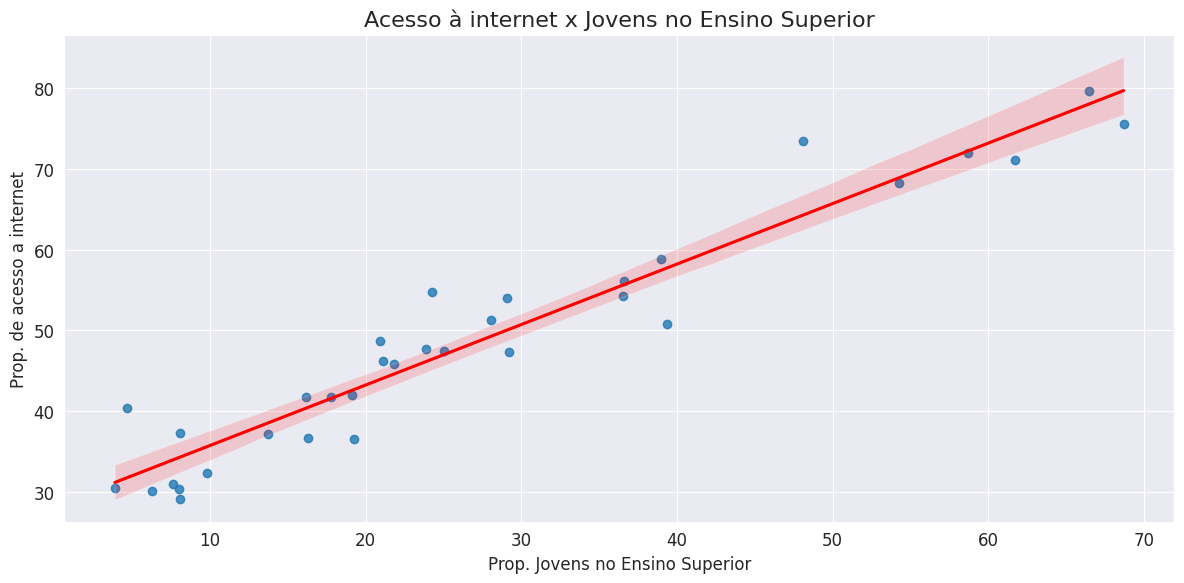

In [141]:
# Relação entre Acesso a internet e pessoas
plt.rcParams["figure.figsize"] = [12, 6]
sns.regplot(indicadores_2020, x='prop_frequencia_ensino_superior', y='prop_acesso_internet', line_kws=dict(color="r"))
plt.xlabel('Prop. Jovens no Ensino Superior', fontsize=12)
plt.ylabel('Prop. de acesso a internet', fontsize=12)
plt.title('Acesso à internet x Jovens no Ensino Superior', fontsize=16)
plt.show()

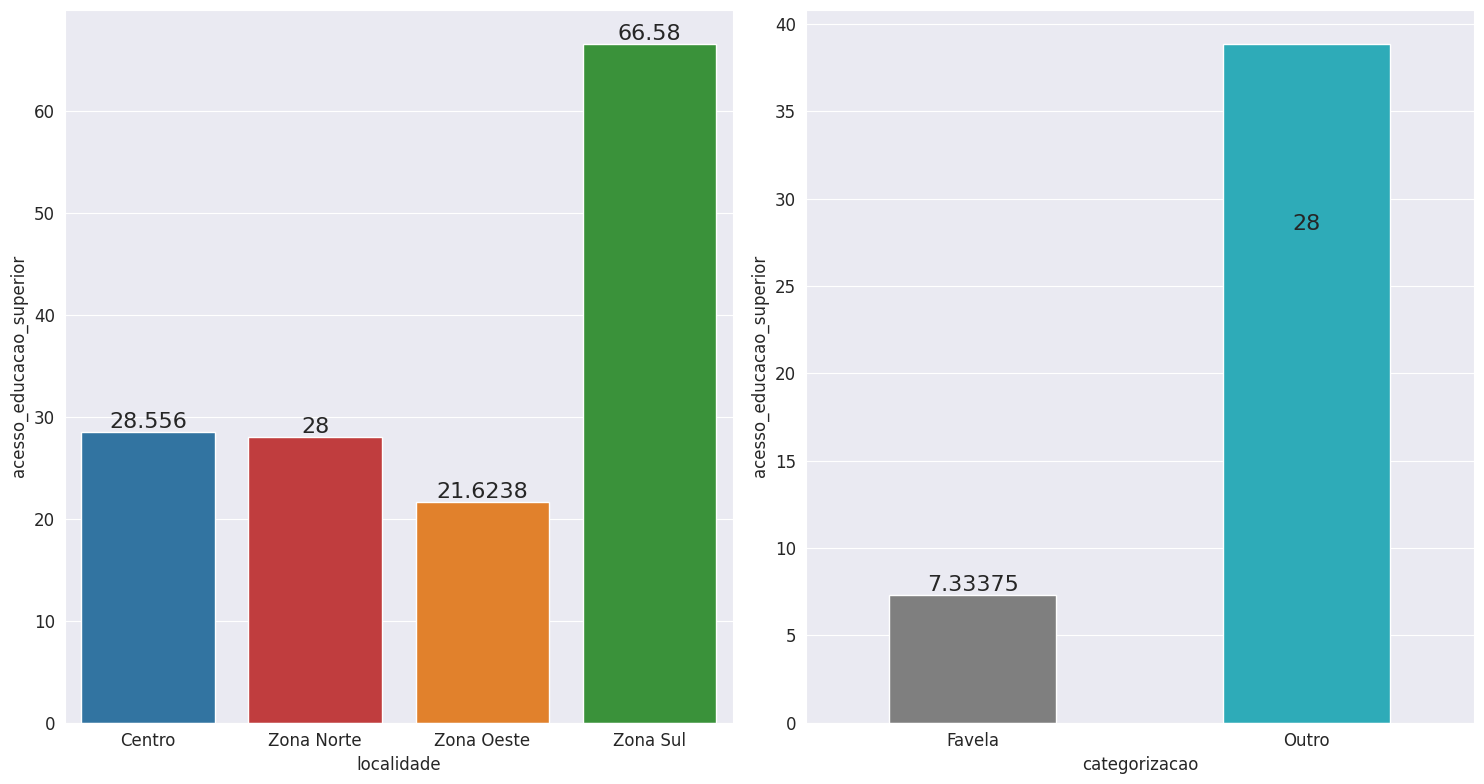

In [142]:
janela, graf = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
fig1 = sns.barplot(componentes_edu.groupby('localidade').mean(), y='acesso_educacao_superior', x='localidade', hue='localidade', ax=graf[0], palette=cores1)
fig1.bar_label(fig1.containers[0], fontsize=16)
fig1.bar_label(fig1.containers[1], fontsize=16)
fig1.bar_label(fig1.containers[2], fontsize=16)
fig1.bar_label(fig1.containers[3], fontsize=16)
fig2 = sns.barplot(componentes_edu.groupby('categorizacao').mean(), y='acesso_educacao_superior', x='categorizacao', hue='categorizacao', width= 0.5, ax=graf[1], palette=cores2)
fig2.bar_label(fig2.containers[0], fontsize=16)
fig2.bar_label(fig1.containers[1], fontsize=16)
janela.show()

Text(0.5, 1.0, 'Proporção da população total e de grupos étnicos com Ensino Superior')

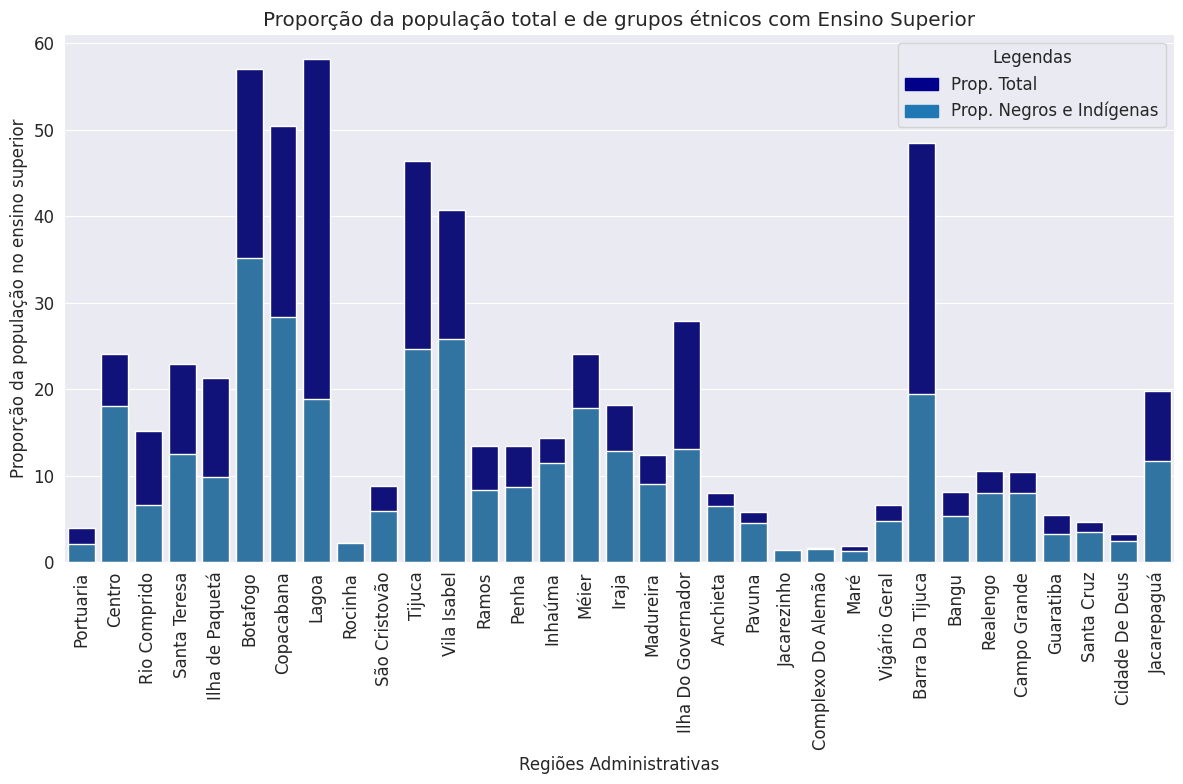

In [143]:
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = [12, 8]
cor1, cor2 = sns.color_palette("Paired")[1],sns.color_palette("Paired")[0]

bar1 = sns.barplot(indicadores_2020, x='regiao_administrativa', y='prop_pessoas_ensino_superior', color='darkblue')
bar2 = sns.barplot(indicadores_2020, x='regiao_administrativa', y='prop_negros_indigenas_ensino_superior', color=cor1)

legend_labels = ['Prop. Total', 'Prop. Negros e Indígenas']
legend_handles = [Patch(color='darkblue', label=legend_labels[0]),
                  Patch(color=cor1, label=legend_labels[1])]
plt.legend(handles=legend_handles, title='Legendas', labels=legend_labels)
plt.xticks(rotation=90)
plt.ylabel('Proporção da população no ensino superior')
plt.xlabel('Regiões Administrativas')
plt.title('Proporção da população total e de grupos étnicos com Ensino Superior')

In [144]:
# Menores prop de adultos com ensino superior
indicadores_2020.sort_values('prop_pessoas_ensino_superior').head().filter(['prop_pessoas_ensino_superior','localidade', 'categorizacao'])

,prop_pessoas_ensino_superior,localidade,categorizacao
regiao_administrativa,,,
Jacarezinho,1.13,Zona Norte,Favela
Complexo Do Alemão,1.64,Zona Norte,Favela
Maré,1.84,Zona Norte,Favela
Rocinha,1.92,Zona Sul,Favela
Cidade De Deus,3.28,Zona Oeste,Favela
